In [4]:
%cd D:\baiyu\project\python\wcnc
%matplotlib notebook

import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sys
from mpl_toolkits.mplot3d import Axes3D

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
%config InlineBackend.figure_format = 'pdf'

D:\baiyu\project\python\wcnc
Python version 3.6.1 (v3.6.1:69c0db5, Mar 21 2017, 18:41:36) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.19.2
Matplotlib version 2.0.0


In [2]:
db_filename = r'E:/Development/cygwin/home/baiyu/rgn3.db'
with sqlite3.connect(db_filename) as conn:
    sgl = pd.read_sql_query("SELECT * from Singletons", conn)
    exp = pd.read_sql_query("SELECT * from Experiments", conn)

# x = exp[exp['strategy']=='lte-multi-ue']['run']
# print(sgl.head(10))
# sgl[(sgl['run'].isin(x)) & (sgl['variable']=='ReceivePackets-total')]['value']

# x = exp[exp['strategy']=='lte-single-ue']['run']
# sgl[(sgl['run'].isin(x)) & (sgl['variable']=='ReceivePackets-total')]['value']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


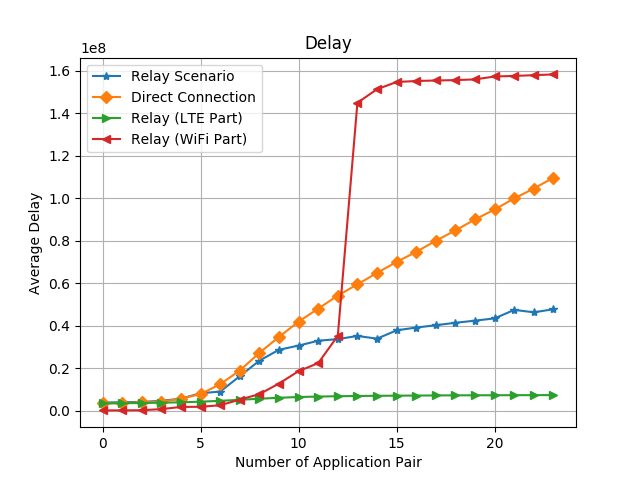

In [6]:
program = [ 
    'wifi-lte',
    'lte-multi-ue', 
    'lte-single-ue', 
    'wifi-multi-ue', 
]

style = {
    'wifi-lte': '*',
    'lte-single-ue': '>', 
    'wifi-multi-ue': '<', 
    'lte-multi-ue': 'D',  
}

lgd = {
    'wifi-lte': 'Relay Scenario',
    'lte-single-ue': 'Relay (LTE Part)', 
    'wifi-multi-ue': 'Relay (WiFi Part)', 
    'lte-multi-ue': 'Direct Connection', 
}

def get_results(var_name):

    sql='''
    select e.input, s.value
    from Singletons s
    inner join Experiments e
    on e.run = s.run
    where e.strategy = :strategy  and s.variable=:variable and e.description="full"
    order by cast(e.input as real)
    '''

    results = dict()

    for x in program:
        results[x] = []

    with sqlite3.connect(db_filename) as conn:
        cursor = conn.cursor()
        for p in program:
            cursor.execute(sql, {'strategy': p,
                                 'variable': var_name})
            for i,x in cursor.fetchall():
                results[p].append(x)
    return results

results = get_results('ReceivePackets-total')

for x,xs in results.items():
    plt.plot(xs, label=lgd[x], marker=style[x])
plt.legend()
plt.grid()
plt.xlabel('Number of Application Pair')
plt.ylabel('Throughtput')

results = get_results('Delay-average')
plt.figure()
for x,xs in results.items():
    plt.plot(xs, label=lgd[x], marker=style[x])
plt.legend()
plt.title('Delay')
plt.grid()
plt.xlabel('Number of Application Pair')
plt.ylabel('Average Delay')